In [38]:
import rethinkdb as r
from db_manager import DBmanager
from rethinkdb.errors import *
from time import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [24]:
## RESET
d = DBmanager()
r.db(d.db_name).table('Competidor').delete().run(d.connection)
ids = {}
ids['table'] = r.db(d.db_name).table('Competidor').config().run(d.connection)['id'],
ids['table'] = ids['table'][0]
ids['servers'] = [c['id'] for c in r.db('rethinkdb').table('server_config').run(d.connection)]

In [22]:
def get_info(range_limit):
    doc_amount = []
    server_id = []
    inserted_docs = []
    for i in range(range_limit):
        a = 0
        while a < 100:
            a += 1
            try:
                d.insert_competidor(i, 'Pedro', 'Dragon', [1], [1], [1])
                a = 101
            except ReqlOpIndeterminateError:
                sleep(5)
                print a
            except ReqlOpFailedError:
                print a
                sleep(5)

        if i % 100 == 0:
            r.db(d.db_name).table('Competidor').rebalance().run(d.connection)
            for s in ids['servers']:
                print ids['table'], s
                t = r.db('rethinkdb') \
                     .table('stats') \
                     .get(['table_server', ids['table'], s]) \
                     .run(d.connection)['query_engine']['written_docs_total']
                doc_amount.append(t)
                server_id.append(s)
                inserted_docs.append(i)
    return pd.DataFrame({'server_id': server_id, 'document_amount': doc_amount, 'inserted_documents': inserted_docs})

In [25]:
df = get_info(10000)

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 0}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetido

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 49}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 50}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 51}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 52}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 53}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 54}, 'Competidor')
('Insertado corr

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 100}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 101}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 102}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 149}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 150}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 151}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 152}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 153}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 154}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 200}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 201}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 202}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 249}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 250}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 251}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 252}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 253}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 254}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 300}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 301}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 302}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 349}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 350}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 351}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 352}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 353}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 354}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 399}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 400}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 401}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 447}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 448}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 449}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 450}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 451}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 452}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 498}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 499}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 500}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 547}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 548}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 549}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 550}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 551}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 552}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 598}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 599}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 600}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICom

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 647}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 648}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 649}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 650}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 651}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 652}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 697}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 698}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 699}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 700}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 746}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 747}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 748}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 749}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 750}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 751}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 796}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 797}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 798}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 799}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 800}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d1

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 845}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 846}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 847}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 848}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 849}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 850}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 895}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 896}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 897}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 898}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 899}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 900}, 'Competidor')
bdb06ff7-2

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 943}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 944}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 945}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 946}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 947}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 948}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 993}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 994}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 995}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 996}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 997}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 998}, 'Competidor')
('Insertad

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1041}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1042}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1043}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1044}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1045}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1046}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1092}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1093}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1094}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1095}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1096}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1097}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1140}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1141}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1142}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1143}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1144}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1145}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1190}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1191}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1192}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1193}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1194}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1195}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1239}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1240}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1241}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1242}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1243}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1244}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1289}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1290}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1291}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1292}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1293}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1294}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1337}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1338}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1339}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1340}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1341}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1342}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1388}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1389}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1390}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1391}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1392}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1393}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1437}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1438}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1439}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1440}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1441}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1442}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1488}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1489}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1490}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1491}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1492}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1493}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1536}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1537}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1538}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1539}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1540}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1541}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1586}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1587}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1588}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1589}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1590}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1591}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1634}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1635}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1636}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1637}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1638}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1639}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1684}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1685}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1686}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1687}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1688}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1689}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1732}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1733}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1734}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1735}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1736}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1737}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1783}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1784}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1785}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1786}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1787}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1788}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1831}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1832}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1833}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1834}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1835}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1836}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1881}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1882}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1883}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1884}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1885}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1886}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1929}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1930}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1931}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1932}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1933}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1934}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1979}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1980}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1981}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1982}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1983}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 1984}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2027}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2028}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2029}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2030}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2031}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2032}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2077}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2078}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2079}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2080}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2081}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2082}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2126}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2127}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2128}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2129}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2130}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2131}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2176}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2177}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2178}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2179}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2180}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2181}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2224}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2225}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2226}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2227}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2228}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2229}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2275}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2276}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2277}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2278}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2279}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2280}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2323}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2324}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2325}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2326}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2327}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2328}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2373}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2374}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2375}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2376}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2377}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2378}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2421}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2422}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2423}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2424}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2425}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2426}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2471}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2472}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2473}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2474}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2475}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2476}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2519}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2520}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2521}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2522}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2523}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2524}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2569}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2570}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2571}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2572}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2573}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2574}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2617}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2618}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2619}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2620}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2621}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2622}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2668}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2669}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2670}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2671}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2672}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2673}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2716}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2717}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2718}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2719}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2720}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2721}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2766}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2767}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2768}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2769}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2770}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2771}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2814}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2815}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2816}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2817}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2818}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2819}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2865}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2866}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2867}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2868}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2869}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2870}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2913}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2914}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2915}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2916}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2917}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2918}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2963}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2964}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2965}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2966}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2967}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 2968}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3011}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3012}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3013}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3014}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3015}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3016}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3061}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3062}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3063}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3064}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3065}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3066}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3109}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3110}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3111}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3112}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3113}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3114}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3160}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3161}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3162}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3163}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3164}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3165}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3208}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3209}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3210}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3211}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3212}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3213}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3258}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3259}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3260}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3261}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3262}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3263}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3307}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3308}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3309}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3310}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3311}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3312}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3357}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3358}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3359}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3360}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3361}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3362}, 'Competidor')
('In

1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3405}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3406}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3407}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3408}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3409}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3410}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3456}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3457}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3458}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3459}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3460}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3461}, 'Competidor')
('In

1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3504}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3505}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3506}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3507}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3508}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3509}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3555}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3556}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3557}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3558}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3559}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3560}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3603}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3604}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3605}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3606}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3607}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3608}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3654}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3655}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3656}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3657}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3658}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3659}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3702}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3703}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3704}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3705}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3706}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3707}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3752}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3753}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3754}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3755}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3756}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3757}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3802}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3803}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3804}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3805}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3806}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3807}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3853}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3854}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3855}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3856}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3857}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3858}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3901}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3902}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3903}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3904}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3905}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3906}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3951}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3952}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3953}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3954}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3955}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 3956}, 'Competidor')
('In

bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4001}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4002}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4003}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'D

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4049}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4050}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4051}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4052}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4053}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4054}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4100}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4101}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4102}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4149}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4150}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4151}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4152}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4153}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4154}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4200}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4201}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4202}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4248}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4249}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4250}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4251}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4252}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4253}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4299}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4300}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4301}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4347}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4348}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4349}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4350}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4351}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4352}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4397}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4398}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4399}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4400}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f2

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4445}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4446}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4447}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4448}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4449}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4450}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4496}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4497}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4498}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4499}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4500}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99e

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4545}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4546}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4547}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4548}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4549}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4550}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4596}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4597}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4598}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4599}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4600}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99e

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4645}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4646}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4647}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4648}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4649}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4650}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4696}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4697}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4698}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4699}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4700}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99e

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4744}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4745}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4746}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4747}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4748}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4749}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4794}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4795}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4796}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4797}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4798}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4799}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4843}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4844}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4845}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4846}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4847}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4848}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4894}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4895}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4896}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4897}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4898}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4899}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4942}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4943}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4944}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4945}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4946}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4947}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4993}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4994}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4995}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4996}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4997}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 4998}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5042}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5043}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5044}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5045}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5046}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5047}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5093}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5094}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5095}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5096}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5097}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5098}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5142}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5143}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5144}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5145}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5146}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5147}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5192}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5193}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5194}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5195}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5196}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5197}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5240}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5241}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5242}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5243}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5244}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5245}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5290}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5291}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5292}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5293}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5294}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5295}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5339}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5340}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5341}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5342}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5343}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5344}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5390}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5391}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5392}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5393}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5394}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5395}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5438}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5439}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5440}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5441}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5442}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5443}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5488}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5489}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5490}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5491}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5492}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5493}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5536}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5537}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5538}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5539}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5540}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5541}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5587}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5588}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5589}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5590}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5591}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5592}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5636}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5637}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5638}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5639}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5640}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5641}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5686}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5687}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5688}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5689}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5690}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5691}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5734}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5735}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5736}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5737}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5738}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5739}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5784}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5785}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5786}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5787}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5788}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5789}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5832}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5833}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5834}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5835}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5836}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5837}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5883}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5884}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5885}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5886}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5887}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5888}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5931}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5932}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5933}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5934}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5935}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5936}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5981}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5982}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5983}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5984}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5985}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 5986}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6029}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6030}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6031}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6032}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6033}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6034}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6079}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6080}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6081}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6082}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6083}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6084}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6128}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6129}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6130}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6131}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6132}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6133}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6178}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6179}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6180}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6181}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6182}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6183}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6226}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6227}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6228}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6229}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6230}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6231}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6276}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6277}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6278}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6279}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6280}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6281}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6324}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6325}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6326}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6327}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6328}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6329}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6375}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6376}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6377}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6378}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6379}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6380}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6423}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6424}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6425}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6426}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6427}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6428}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6474}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6475}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6476}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6477}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6478}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6479}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6522}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6523}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6524}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6525}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6526}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6527}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6572}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6573}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6574}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6575}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6576}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6577}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6620}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6621}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6622}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6623}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6624}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6625}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6670}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6671}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6672}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6673}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6674}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6675}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6718}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6719}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6720}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6721}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6722}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6723}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6768}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6769}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6770}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6771}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6772}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6773}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6816}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6817}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6818}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6819}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6820}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6821}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6867}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6868}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6869}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6870}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6871}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6872}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6915}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6916}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6917}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6918}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6919}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6920}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6965}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6966}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6967}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6968}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6969}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 6970}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7013}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7014}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7015}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7016}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7017}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7018}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7064}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7065}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7066}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7067}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7068}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7069}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7112}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7113}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7114}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7115}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7116}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7117}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7163}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7164}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7165}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7166}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7167}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7168}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7211}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7212}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7213}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7214}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7215}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7216}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7262}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7263}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7264}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7265}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7266}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7267}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7310}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7311}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7312}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7313}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7314}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7315}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7360}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7361}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7362}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7363}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7364}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7365}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7408}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7409}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7410}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7411}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7412}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7413}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7459}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7460}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7461}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7462}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7463}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7464}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7507}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7508}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7509}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7510}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7511}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7512}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7558}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7559}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7560}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7561}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7562}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7563}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7606}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7607}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7608}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7609}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7610}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7611}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7657}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7658}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7659}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7660}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7661}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7662}, 'Competidor')
('In

1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7705}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7706}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7707}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7708}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7709}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7710}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7756}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7757}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7758}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7759}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7760}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7761}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7804}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7805}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7806}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7807}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7808}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7809}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7854}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7855}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7856}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7857}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7858}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7859}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7902}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7903}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7904}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7905}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7906}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7907}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7953}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7954}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7955}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7956}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7957}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 7958}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8001}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8002}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8003}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8004}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8005}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8006}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8052}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8053}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8054}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8055}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8056}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8057}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8101}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8102}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8103}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8104}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8105}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8106}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8152}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8153}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8154}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8155}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8156}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8157}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8201}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8202}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8203}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8204}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8205}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8206}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8252}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8253}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8254}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8255}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8256}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8257}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8302}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8303}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8304}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8305}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8306}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8307}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8352}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8353}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8354}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8355}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8356}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8357}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8401}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8402}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8403}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8404}, 'Competidor')
1
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8405}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8406}, 'Competidor')
('

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8451}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8452}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8453}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8454}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8455}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8456}, 'Competidor')
('In

bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8501}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8502}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8503}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8549}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8550}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8551}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8552}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8553}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8554}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8599}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8600}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8601}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8647}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8648}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8649}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8650}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8651}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8652}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8698}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8699}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8700}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f252fe7-7efe-437c-b235-138bf9dc1b1d
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNI

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8746}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8747}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8748}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8749}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8750}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8751}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8797}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8798}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8799}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8800}, 'Competidor')
bdb06ff7-28d1-4b4f-99ec-4d197786a12b c2cacc07-4863-4fbd-b75b-52a743ddb21e
bdb06ff7-28d1-4b4f-99ec-4d197786a12b bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 7dff1f3f-84e8-46c2-9d43-75e67010710f
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 4c050c83-d05c-4f7b-99c1-30e60f15cfc1
bdb06ff7-28d1-4b4f-99ec-4d197786a12b 8f2

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8845}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8846}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8847}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8848}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8849}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8850}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8895}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8896}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8897}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8898}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8899}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8900}, 'Competidor')
bdb0

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8943}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8944}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8945}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8946}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8947}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8948}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8994}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8995}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8996}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8997}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8998}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 8999}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9043}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9044}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9045}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9046}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9047}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9048}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9094}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9095}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9096}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9097}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9098}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9099}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9142}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9143}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9144}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9145}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9146}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9147}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9192}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9193}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9194}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9195}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9196}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9197}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9241}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9242}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9243}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9244}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9245}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9246}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9291}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9292}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9293}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9294}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9295}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9296}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9339}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9340}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9341}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9342}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9343}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9344}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9389}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9390}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9391}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9392}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9393}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9394}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9437}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9438}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9439}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9440}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9441}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9442}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9487}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9488}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9489}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9490}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9491}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9492}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9535}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9536}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9537}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9538}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9539}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9540}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9586}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9587}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9588}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9589}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9590}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9591}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9635}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9636}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9637}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9638}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9639}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9640}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9686}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9687}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9688}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9689}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9690}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9691}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9734}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9735}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9736}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9737}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9738}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9739}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9784}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9785}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9786}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9787}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9788}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9789}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9832}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9833}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9834}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9835}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9836}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9837}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9883}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9884}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9885}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9886}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9887}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9888}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9931}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9932}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9933}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9934}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9935}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9936}, 'Competidor')
('In

('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9982}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9983}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9984}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9985}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9986}, 'Competidor')
('Insertado correctamente: ', {'Plata': [1], 'Bronce': [1], 'Oro': [1], 'NombreCompetidor': 'Pedro', 'NombreEscuela': 'Dragon', 'DNICompetidor': 9987}, 'Competidor')
('In

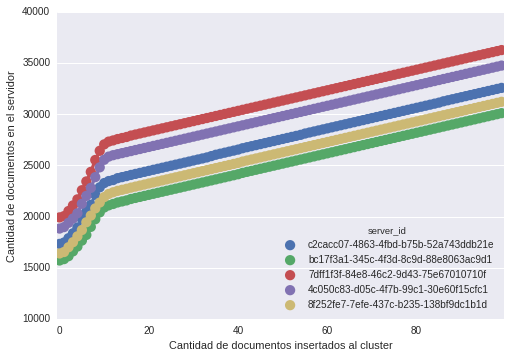

,document_amount,inserted_documents,server_id
0,17321,0,c2cacc07-4863-4fbd-b75b-52a743ddb21e
1,15701,0,bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
2,19912,0,7dff1f3f-84e8-46c2-9d43-75e67010710f
3,18823,0,4c050c83-d05c-4f7b-99c1-30e60f15cfc1
4,16388,0,8f252fe7-7efe-437c-b235-138bf9dc1b1d
5,17456,100,c2cacc07-4863-4fbd-b75b-52a743ddb21e
6,15836,100,bc17f3a1-345c-4f3d-8c9d-88e8063ac9d1
7,20037,100,7dff1f3f-84e8-46c2-9d43-75e67010710f
8,18966,100,4c050c83-d05c-4f7b-99c1-30e60f15cfc1
9,16528,100,8f252fe7-7efe-437c-b235-138bf9dc1b1d


In [45]:
sns.pointplot(x='inserted_documents', y='document_amount', hue='server_id', data=df, join=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
ax.set_ylabel('Cantidad de documentos en el servidor')
ax.set_xlabel('Cantidad de documentos insertados al cluster')
plt.show()
display(df.head(20))